In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('log_regr.txt', sep=' ',header=None)

In [7]:
df.columns

Int64Index([0, 1, 2], dtype='int64')

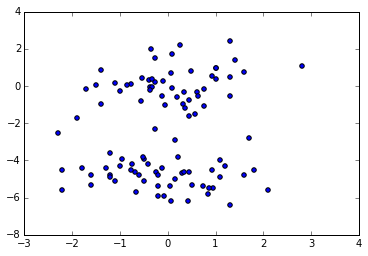

In [12]:
plt.scatter(df[0], df[1])
plt.show()

In [30]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [31]:
def calc_hypo (parameters, x, y):
    return sigmoid(parameters[0] + parameters[1] * x + parameters[2] * y)

In [32]:
def cost_func(dataFrame, parameters):
    l= 0
    for index, row in dataFrame.iterrows():
        h = calc_hypo(parameters, row[0], row[1])
        l += row[2]*np.log(h) + (1 - row[2])*np.log(1-h)
    return l/len(dataFrame)

In [80]:
def logistic_regression(dataFrame, parameters, alpha):
    cost_prev = 0
    cost = cost_func (dataFrame, parameters)
    for iter in range(100):
        for index, row in dataFrame.iterrows():
            h = calc_hypo (parameters, row[0], row[1])
            parameters[0] += alpha * (row[2] - h) 
            parameters[1] += alpha * (row[2] - h) * row[0]
            parameters[2] += alpha * (row[2] - h) * row[1]
        cost_new = cost_func (dataFrame, parameters)
        if((cost_new - cost) < 0.01 * (cost - cost_prev)):
            return parameters
    return parameters

In [81]:
def model_point(x, parameters):
    return -(parameters[0] + parameters[1] * x)/parameters[2]

In [92]:
parameters = np.random.uniform(-0.01, 0.01, 3)
trained_parameters = np.copy(parameters)

In [203]:
trained_parameters = np.copy(parameters)
trained_parameters = logistic_regression(df, trained_parameters, 1.3)

In [204]:
print parameters
print trained_parameters

[ 0.00737924  0.00288994 -0.00466296]
[ 18.3113075   -3.50855949   7.44295048]


In [205]:
fig_size = [0,0]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

line1, = plt.plot([-4, 5], [model_point(-4, parameters), model_point(5, parameters)],'b-', label='Initial model')
line2, = plt.plot([-4, 5], [model_point(-4, trained_parameters), model_point(5, trained_parameters)],'k-', label = 'Trained model')

pos_df = df.loc[df[2] == 1]
neg_df = df.loc[df[2] == 0]

line3 = plt.scatter(pos_df[0], pos_df[1], facecolors='none', marker='+', edgecolors='g', label ='Pos data points')
line4 = plt.scatter(neg_df[0], neg_df[1], facecolors='none', edgecolors='r', label = 'Neg data points')

axes = plt.gca()
axes.set_xlim([-4, 5])
axes.set_ylim([-8, 4])

legend = plt.legend(handles=[line1, line2, line3, line4], loc=1)
plt.show()

In [206]:
print parameters
print trained_parameters
print cost_func(df, trained_parameters)

In [ ]:
stops improving
1.3 -0.00167509829016
1.2 -0.00181900023992
1.1 -0.00199835624041
1 -0.00219674107781
0.9 -0.00242330616229
0.1 -0.0105517211685
0.05 -0.0159056854238
0.02 -0.0275461702364
0.01 -0.0421795765282
0.008 -0.0485041674153
0.005 -0.0653630216966